In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('MVR.csv')
df.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


In [6]:
df.shape

(4047, 13)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.2+ KB


,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


In [9]:
df.isnull().sum()

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64

In [10]:
df.dropna

<bound method DataFrame.dropna of             Date      Open_M      High_M       Low_M     Close_M  Adj Close_M  \
0     2008-06-02   30.926001   32.000000   30.257000   32.000000    29.529486   
1     2008-06-03   31.386999   31.399000   30.235001   30.740000    28.366755   
2     2008-06-04   30.745001   30.959999   29.454000   29.740000    27.443956   
3     2008-06-05   29.951000   30.615999   29.544001   30.615999    28.252338   
4     2008-06-06   30.228001   30.242001   29.481001   29.573000    27.289856   
...          ...         ...         ...         ...         ...          ...   
4042  2024-06-24  454.929993  463.070007  454.929993  456.959991   456.959991   
4043  2024-06-25  458.480011  460.309998  453.799988  455.649994   455.649994   
4044  2024-06-26  452.750000  454.679993  451.390015  452.380005   452.380005   
4045  2024-06-27  448.570007  448.700012  442.000000  442.750000   442.750000   
4046  2024-06-28  444.640015  448.299988  438.720001  441.160004   441.1600

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
df

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,NaN,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,NaN,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,NaN,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,NaN,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,NaN,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,NaN,454.929993,463.070007,454.929993,456.959991,456.959991,2597100,275.320007,280.390015,275.269989,276.299988,276.299988,24149600
4043,NaN,458.480011,460.309998,453.799988,455.649994,455.649994,2529600,276.850006,277.929993,273.529999,273.529999,273.529999,19897700
4044,NaN,452.750000,454.679993,451.390015,452.380005,452.380005,2451400,272.910004,274.459991,271.750000,273.600006,273.600006,12172000
4045,NaN,448.570007,448.700012,442.000000,442.750000,442.750000,3313800,268.510010,270.589996,266.500000,266.589996,266.589996,10529100


In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

In [14]:
summary_stats = df.describe()
summary_stats

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,0.0,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,NaN,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,NaN,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,NaN,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,NaN,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,NaN,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,NaN,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,NaN,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


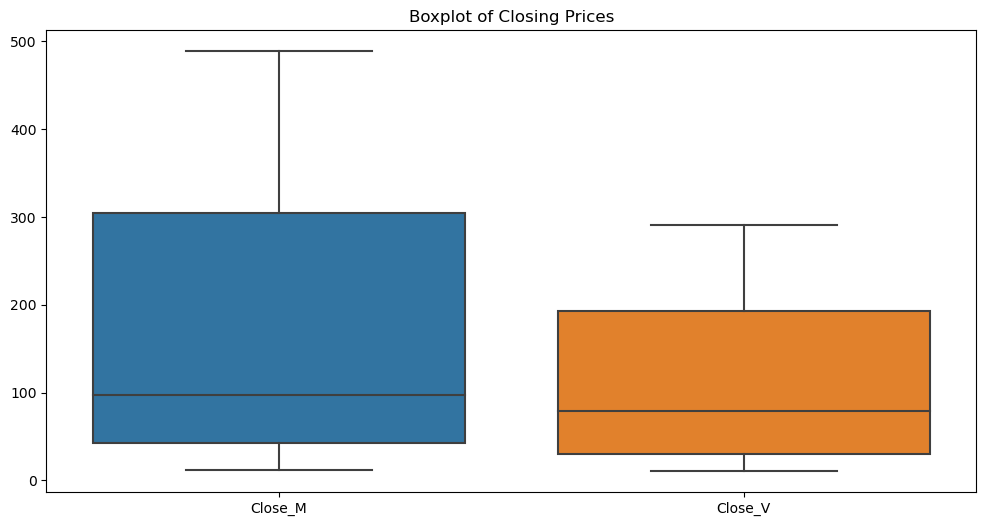

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Close_M', 'Close_V']])
plt.title('Boxplot of Closing Prices')
plt.show()

In [16]:
correlation_matrix = df.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
              Date    Open_M    High_M     Low_M   Close_M  Adj Close_M  \
Date          NaN       NaN       NaN       NaN       NaN          NaN   
Open_M        NaN  1.000000  0.999901  0.999873  0.999782     0.999693   
High_M        NaN  0.999901  1.000000  0.999834  0.999882     0.999776   
Low_M         NaN  0.999873  0.999834  1.000000  0.999897     0.999827   
Close_M       NaN  0.999782  0.999882  0.999897  1.000000     0.999912   
Adj Close_M   NaN  0.999693  0.999776  0.999827  0.999912     1.000000   
Volume_M      NaN -0.416720 -0.415546 -0.418242 -0.416961    -0.412827   
Open_V        NaN  0.996419  0.996274  0.996382  0.996251     0.995531   
High_V        NaN  0.996445  0.996452  0.996446  0.996430     0.995704   
Low_V         NaN  0.996263  0.996155  0.996421  0.996281     0.995570   
Close_V       NaN  0.996253  0.996259  0.996403  0.996427     0.995709   
Adj Close_V   NaN  0.997055  0.997043  0.997230  0.997233     0.996745   
Volume_V      NaN

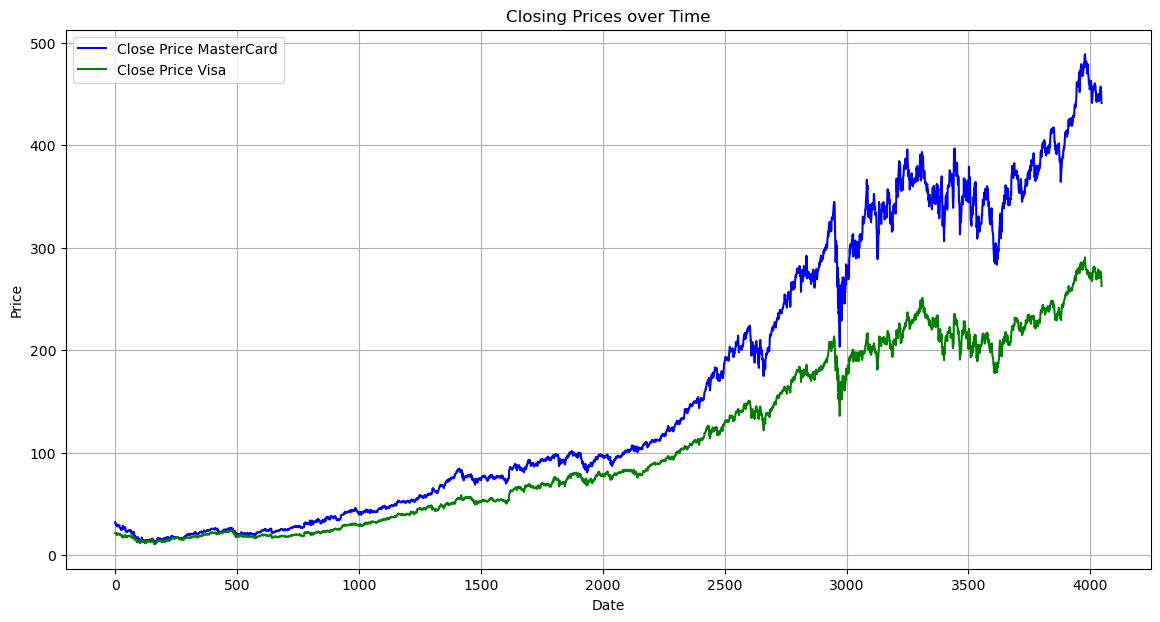

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close_M'], label='Close Price MasterCard', color='blue')
plt.plot(df.index, df['Close_V'], label='Close Price Visa', color='green')
plt.title('Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

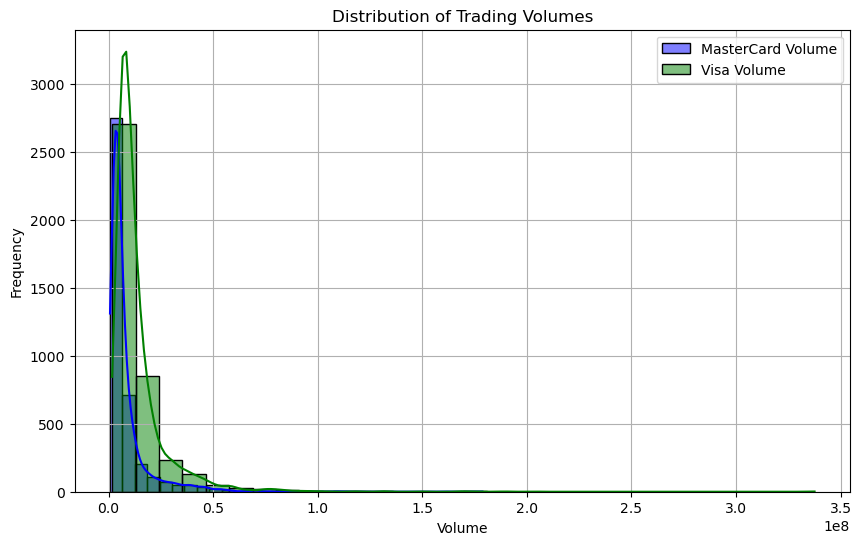

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume_M'], bins=30, kde=True, color='blue', label='MasterCard Volume')
sns.histplot(df['Volume_V'], bins=30, kde=True, color='green', label='Visa Volume')
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
X = df[['Open_M', 'High_M', 'Low_M', 'Close_V', 'Open_V', 'High_V', 'Low_V']]
y = df['Close_M']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6526685855900525


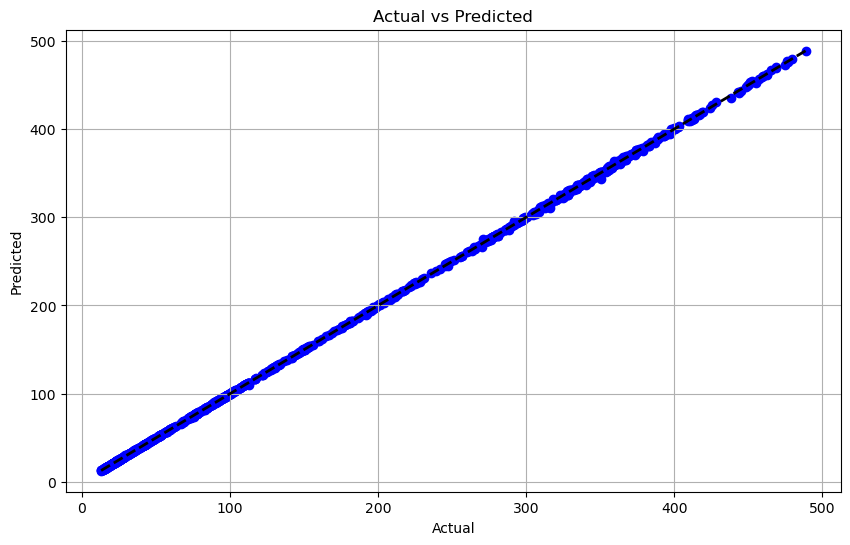

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

Project content and basic steps:
1. Load and explore the data:
Stock price data is loaded from a CSV file into a data frame using the pandas library.
The first few rows of data are displayed to understand its structure and make sure it is loaded correctly.
2. Converting the data and handling missing values:
The date column is converted to a date format to ensure proper handling of temporal data.
The data is checked for any missing values, and if found, they can be handled by either filling them in or ignoring them as needed.
3. Calculating the correlation matrix:
The correlation matrix is calculated between the different columns in the data. This helps in understanding the relationships between different variables such as closing prices and trading volume, and whether there is a strong correlation between them or not.
4. Plotting the data:
Graphs are created to display the closing prices for both MasterCard and Visa stocks over the selected time period. This helps in seeing trends and patterns in prices over time.
5. Calculate Moving Averages:
Moving averages are calculated for closing prices over different time periods (e.g. 50 days and 200 days). Moving averages help in understanding long-term trends by smoothing out the impact of short-term fluctuations.
6. Plotting moving averages with prices:
A graph is created that displays the moving averages along with the closing prices. This helps in seeing how prices are moving relative to their moving averages, which can give signals about the direction of the market.
The goal of these analyses:
Understanding trends: Through charts and moving averages, you can understand short- and long-term price trends.
Identify relationships: Using a correlation matrix, you can see how different variables interact with each other.
Forecasting and analysis: These steps lay the foundation for advanced analysis and forecasting of stock prices using forecasting models such as ARIMA or LSTM.
If there is a particular part or step you want more details about, or if you need help applying or understanding something in particular, let me know and I'll be happy to help you!

